In [5]:
# Quantum Fourier Transform
# Author: Matthew Townsend
# Date: 5/6/2025

from scipy.linalg import dft
import numpy as np
import pennylane as qml
from functools import partial
import matplotlib.pyplot as plt


In [6]:
n = 2
print("n =2")
print(np.round(1/np.sqrt(2**n) * dft(2 ** n), 2))

qft_inverse = qml.adjoint(qml.QFT([0,1]))

print("QFT Inverse")
print(np.round(qft_inverse.matrix(), 2))

n =2
[[ 0.5+0.j   0.5+0.j   0.5+0.j   0.5+0.j ]
 [ 0.5+0.j   0. -0.5j -0.5-0.j  -0. +0.5j]
 [ 0.5+0.j  -0.5-0.j   0.5+0.j  -0.5-0.j ]
 [ 0.5+0.j  -0. +0.5j -0.5-0.j   0. -0.5j]]
QFT Inverse
[[ 0.5-0.j   0.5-0.j   0.5-0.j   0.5-0.j ]
 [ 0.5-0.j   0. -0.5j -0.5-0.j   0. +0.5j]
 [ 0.5-0.j  -0.5-0.j   0.5-0.j  -0.5-0.j ]
 [ 0.5-0.j   0. +0.5j -0.5-0.j   0. -0.5j]]


Matplotlib is building the font cache; this may take a moment.


(<Figure size 1500x500 with 1 Axes>, <Axes: >)

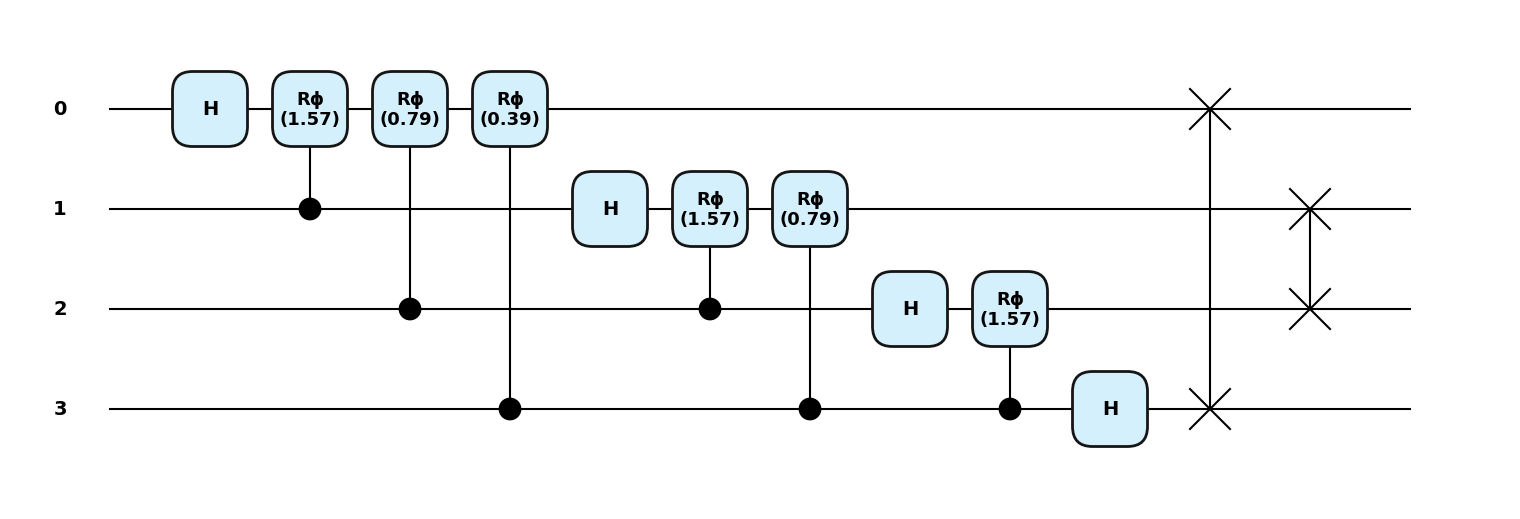

In [7]:
@partial(qml.transforms.decompose, max_expansion=1)
def circuit():
    qml.QFT(wires=range(4))
qml.draw_mpl(circuit, decimals=2, style="pennylane")()

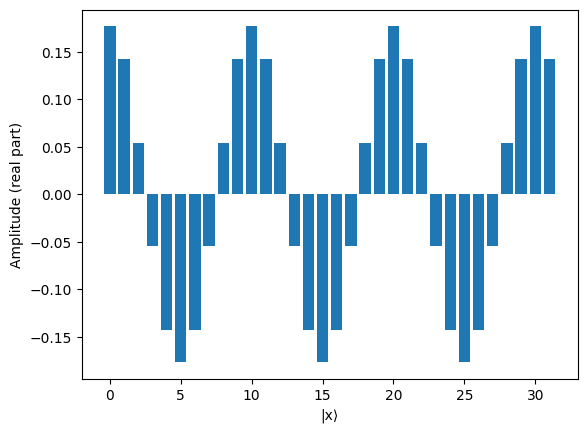

In [8]:
def prep():
    qml.PauliX(wires=0)
    for wire in range(1, 6):
        qml.Hadamard(wires=wire)
    qml.ControlledSequence(qml.PhaseShift(-2 * np.pi / 10, wires=0), control=range(1, 6))
    qml.PauliX(wires=0)

dev = qml.device("default.qubit")
@qml.qnode(dev)
def circuit():
    prep()
    return qml.state()

state = circuit().real[:32]

plt.bar(range(len(state)), state)
plt.xlabel("|x⟩")
plt.ylabel("Amplitude (real part)")
plt.show()

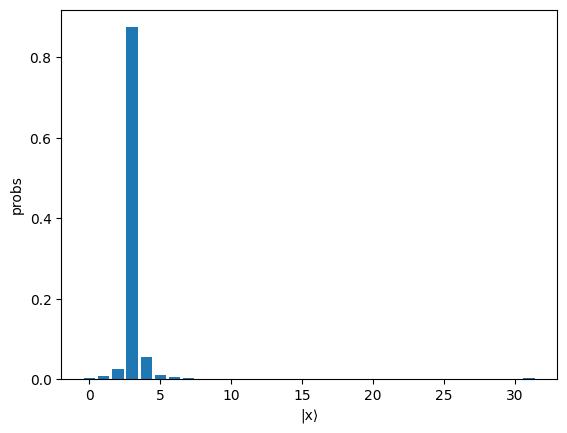

In [9]:
@qml.qnode(dev)
def circuit():
  prep()
  qml.QFT(wires=range(1, 6))

  return qml.probs(wires=range(1, 6))

state = circuit()[:32]

plt.bar(range(len(state)), state)
plt.xlabel("|x⟩")
plt.ylabel("probs")
plt.show()